In [127]:
from numbers import Number
import re
import numpy as np
import matplotlib.pyplot as plt

## Mean Pikachu and Pichu

In [128]:
def mean_files(_width, _height):
    mean_width = np.mean(_width)
    mean_height = np.mean(_height)
    return mean_width, mean_height

## Knn Method

In [129]:
def euclidean(a, b):
    """New method to calculate euclidean with 2D and iD"""      #Help with idea and formula from GPT
    distances = np.sqrt(np.sum((a - b) ** 2, axis=1))
    return distances

def knn(labels, pika_pich, entity_dimensions):
    """K nearest neighbors"""
    distances = euclidean(pika_pich, entity_dimensions)         #Using method above
    nn_5 = np.argsort(distances)[:5]                            #Sorts out nearest 5(k)
    nn_labels = labels[nn_5]                                    #Gets labels from nearest 5                                
    return nn_labels


## Classes for UnknownEntity, Pikachu and pichu

In [130]:
class Pikachu:
    """classes for the users find, Pikachu and Pichu"""
    def __init__(self, width: float, height: float):                                    #contructor", whats sets when making an instance.
        self._width = width
        self._height = height
        
    def add_pikachu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):            #if input is anything nut numbers error message
            raise(f"Height and width must be a number, not '{type(height, width)}'")
            
    @property                                                                           #property to use height instead of the private _height
    def height(self):
        return self._height
    
    @property                                                                            #property to use height instead of the private _weight
    def width(self):
        return self._width

class Pichu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    @property
    def height(self):
        return self._height                                                            
    
    @property
    def width(self):
        return self._width
    
class Entity:
    def __init__(self, width: float, height: float):
        self.width = width
        self.height = height
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
    @height.setter
    def height(self, value: float):
        if not isinstance(value, Number):
            raise ValueError(f"Height must be a number, not {type(value)}")
        self._height = value
    
    @width.setter
    def width(self, value: float):
        if not isinstance(value, Number):
            raise ValueError(f"Width must be a number, not {type(value)}")
        self._width = value

## Cleaning data method

In [131]:
def clean_data(stats_path, from_file):
    """Method to clean data from files or from ex. input"""
    if from_file:
        with open(stats_path, "r") as file:                             #Reads in files to a string if it is a file we want data from
            raw_stats = file.read()
    else:
        raw_stats = stats_path                                          #if input, raw stats is automaticlly the stats_path/input
    
    nospace_dimentions = re.sub(r"[ ]{1,}", "", raw_stats)              #Replacing underscore with ""
    dimentions = re.sub(r"[\n]", ",", nospace_dimentions)               #Replacing \n with ,
    
    dimentions = dimentions.split("),(")                                #Splitting by unessecary ),(
    dimentions =  [x.strip("()") for x in dimentions]
                                                                        #   Regex for pattern (number.(if needed, number.(if needed)))
    pattern = re.compile(r"^\d+(\.\d+)?,\d+(\.\d+)?$")                  #   ^ indicates it's the start of string  $ end of string  Regex reserch GPT
    clean_dimensions = [x for x in dimentions if pattern.match(x)]      #   Cleanng the data so it matches the pattern
                                                                        #   (Takes away anything that's not cordinates)
    
    
    cordinates = [eval(cordinate) for cordinate in clean_dimensions]    #Making string into tuples to be able to calculate them
    _width, _height = zip(*cordinates)                                  #unzips tuple to x, y       Idea from teacher and further reserch
    
    return _width, _height

## Fetching files and cleaning

In [132]:
stats_path_pikachu = "../data/pikachu.txt" 
pikachu_width, pikachu_height = clean_data(stats_path_pikachu, from_file= True)

stats_path_pichu = "../data/pichu.txt"
pichu_width, pichu_height = clean_data(stats_path_pichu, from_file= True)

stats_path = "../Data/test_points.txt"
test_width, test_height = clean_data(stats_path, from_file= True)

"""print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")
print(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")"""

'print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")\nprint(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")'

## User Interface

In [133]:
def ui_console():
    """UI for putting in users unknown find, has not gotten to SRP."""
    while True:                                                         #Error handling for input, only numbers
        try:
            input_width = float(input("Enter width of entity: "))
            input_height = float(input("Enter height of entity: "))
            entity = Entity(input_width, input_height)
            break
        except ValueError:
            print(f"Invalid: only numbers are accepted")
    
    entity_dimensions = (f"({entity.width}, {entity.height})")
    entity_width, entity_height = clean_data(entity_dimensions, from_file= False)       #Cleans input, incase of misinput
    
    pikachu_label = np.zeros(len(pikachu_height), dtype=int)        #labeling pika and pichu to 1, 0
    pichu_label = np.ones(len(pichu_height), dtype=int)

    labels = np.concatenate((pikachu_label, pichu_label))           #"zipping" together into numpy array               
    pika_pich = np.concatenate((                                    #"zipping" together and seperates them, first pika, then Pichu
        np.column_stack((pikachu_width, pikachu_height)), 
        np.column_stack((pichu_width, pichu_height))
        ))
    
    entity_dimensions = np.concatenate((np.column_stack((entity_width, entity_height))))
    

    nn_labels = knn(labels, pika_pich, entity_dimensions)            #My KNN method for getting the first 5 nearest labels from pika and michu to entity
    sum_pikachu = np.sum(nn_labels== 0)                              #Checks how many is 0/Pika
    sum_pichu = 5 - sum_pikachu                                      #And Checks how many 1/Pichu

    if(sum_pikachu > sum_pichu):
        print(f"Looks like your found a Pikachu!")
    else:                                                           #Decides what is most possible
        print(f"Looks like your found a Pichu!")
    print(f"pikachu: {sum_pikachu}\nPichu: {sum_pichu}")
    
    return entity_width, entity_height

## Plotting     /    Main

Looks like your found a Pichu!
pikachu: 0
Pichu: 5


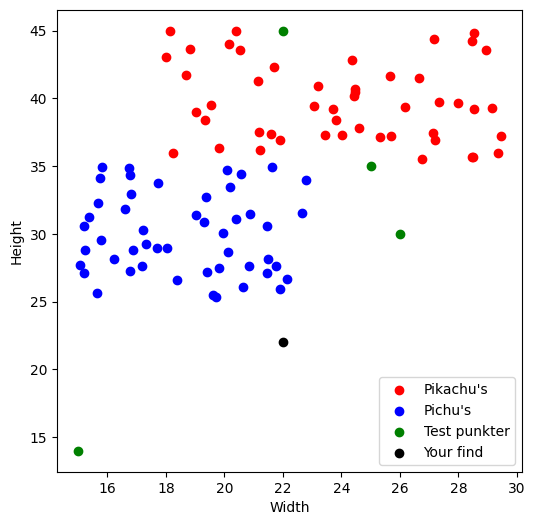

In [134]:
find_width, find_height = ui_console()                                          #Hole program is in UI right now...

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "red", label = "Pikachu's")
plt.scatter(pichu_width, pichu_height, color = "blue", label = "Pichu's")
plt.scatter(test_width, test_height, color = "green", label = "Test punkter")
plt.scatter(find_width, find_height, color = "black", label = "Your find")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")